# **Hotel Booking Demand**

By:  Cai Du Yi, Li Zihan, Zhang Jing Wen

---


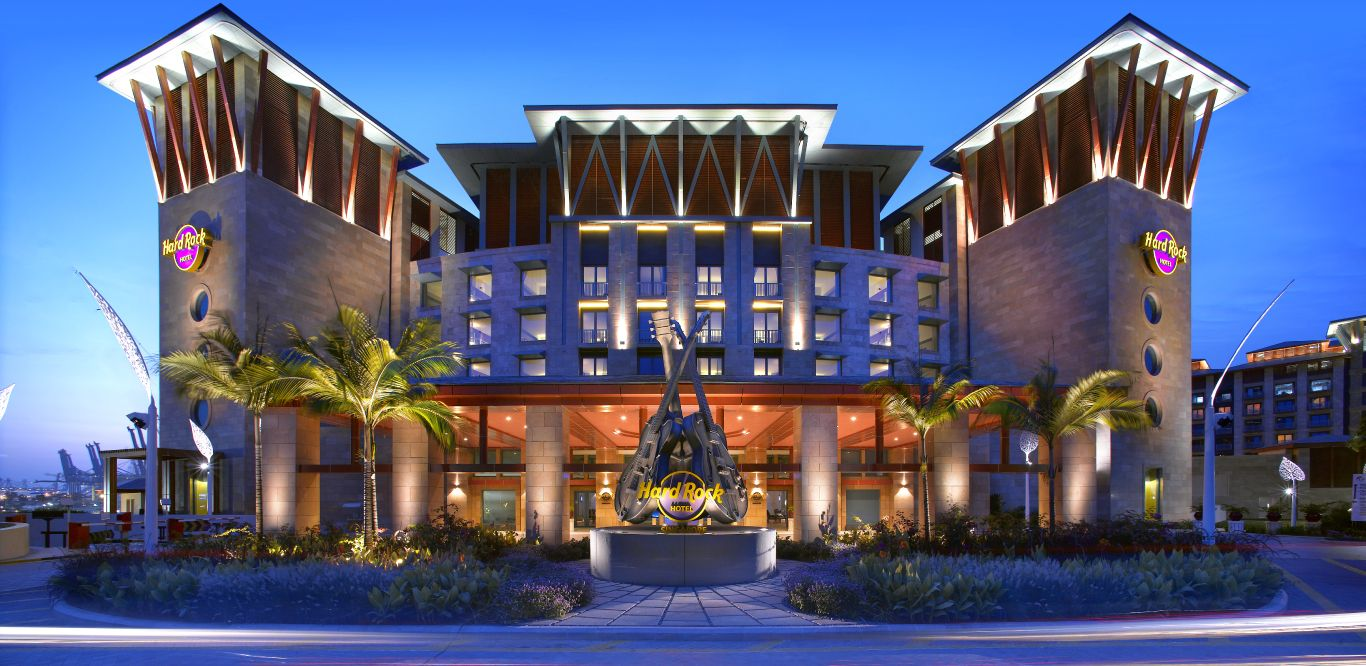

## Let's look at Hotel Booking!

Studies show that the average percentage of canceled reservations is 24% . This implies that "when Hotels calculate their future revenue from existing reservations, they have to reduce it by 24%". (Loeb, 2016)

With Covid restrictions loosening and borders opening, Hotels around the world are seeing a surge in reservations. In order to properly estimate revenue, manpower requirements, and food indents, it is important to be able to to predict the number of reservations that will be cancelled.


### Problem: Predict whether a reservation will be cancelled based on [Variables to be Determined].
---
    
<p><p>Before diving into our analysis though, let's become familiar with the datasets that we will be handling in this project:<br><br></p>

<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/hotel_bookings.csv</b></div>
<ul>
    <li><b>ADR:</b> Average Daily Rate as defined by the sum of all lodging transactions by the total number of staying nights. </li>
    <li><b>Adults:</b> Number of adults.</li>
    <li><b>Agent:</b> ID of the travel agency that made the booking.</li>
    <li><b>ArrivalDateDayOfMonth:</b> Day of the month of the arrival date.</li>
    <li><b>ArrivalDateMonth:</b> Month of arrival date with 12 categories: “January” to “December”.</li>
    <li><b>ArrivalDateWeekNumber:</b> Week number of the arrival date</li>
    <li><b>ArrivalDateYear:</b> Year of arrival date.</li>
    <li><b>AssignedRoomType:</b> Code for the type of room assigned to the booking.</li>
    <li><b>Babies:</b> Number of babies.</li>
    <li><b>BookingChanges:</b> Number of changes/amendments made to the booking from the moment the booking was entered.</li>
    <li><b>Children:</b> Number of children.</li>
    <li><b>Company:</b> ID of the company/entity that made the booking.</li>
    <li><b>Country:</b> Country of origin.</li>
    <li><b>CustomerType:</b> Type of booking, assuming one of <b><i>four</i></b> categories.</li>
    <li><b>DaysInWaitingList:</b> Number of days the booking was in the waiting list before it was confirmed.</li>
    <li><b>DepositType:</b> Indication on if the customer made a deposit to guarantee the booking.</li>
    <li><b>DistributionChannel:</b> Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.</li>
    <li><b>IsCanceled:</b> Value indicating if the <b><i>booking was canceled (1) or not (0)</i></b>.</li>
    <li><b>IsRepeatedGuest:</b> Value indicating if the booking name was from a repeated guest (1) or not (0).</li>
    <li><b>LeadTime:</b> Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.</li>
    <li><b>MarketSegment:</b> Market segment designation.</li>
    <li><b>Meal:</b> Type of meal booked.</li>
    <li><b>PreviousBookingsNotCanceled:</b> Number of previous bookings not cancelled.</li>
    <li><b>PreviousCancellations:</b> Number of previous bookings that were cancelled by the customer.</li>
    <li><b>RequiredCardParkingSpaces:</b> Number of car parking spaces required by the customer.</li>
    <li><b>ReservationStatus:</b> Reservation last status, assuming one of <b><i>three</i></b> categories.</li>
    <li><b>ReservationStatusDate:</b> Date at which the last status was set.</li>
    <li><b>ReservedRoomType:</b> Code of room type reserved.</li>
    <li><b>StaysInWeekendNights:</b> Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.</li>
    <li><b>StaysInWeekNights:</b> Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.</li>
    <li><b>TotalOfSpecialRequests:</b> Number of special requests made by the customer.</li>

</ul>
    </div>
    
<p><b>Full description</b> of the dataset can be found in <a href="https://reader.elsevier.com/reader/sd/pii/S2352340918315191?token=FA4DF3FBFE44ED1ACB88E69DCB548E9E412FFC80309B87B7192C922858831FE9F95F5A9BEBC3E0878955AF4845C2D991&originRegion=eu-west-1&originCreation=20220321081241 ">this article</a>.</p>
<p>From here on out, we will be performing Data Cleaning, Exploratory Data Analysis and Machine Learning to predict the cancellation rate.</p>
<p><em><strong>

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
sb.set() # set the default Seaborn style for graphics
%matplotlib inline

In [2]:
# Reading in the csv data into the hotel_df dataframe
path = "hotel_bookings.csv"
hotel_df = pd.read_csv(path)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **Data Cleaning**
---

### **What is Data Cleaning?**
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. Our dataset has to be cleaned properly before we can perform exploratory data analysis (EDA) to draw meaningful insights.



### **What Needs to be Cleaned?**
In this dataset, there are **6** things needed to be done in order to clean the data. 

1. Drop rows where Country has **NaN**.


2. Convert company, agent and children that is NaN to 0.


3. Remove outliers for ADR (ADR > 5000 and ADR == 0).


4. Concate babies and children columns to `hasKids` column.


5. Create new column called `date_of_arrival` and `arrival_day_of_week`.


6. Create columns `useAgent` and `useCompany`. 


7. Create new column called `total_nights`.


In [3]:
# Getting general information on the dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Getting basic statistics on numeric data
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
# Getting the unqiue values in each column of the dataset
print("Unique Values in Each Column\n")
for var in hotel_df:
    print("Number of Levels in " + var + ":", len(hotel_df[var].unique()))
    print("No. of values in " + var + ":\n", (hotel_df[var].value_counts()))
    print("===============================================================")
    print("\n")

Unique Values in Each Column

Number of Levels in hotel: 2
No. of values in hotel:
 City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


Number of Levels in is_canceled: 2
No. of values in is_canceled:
 0    75166
1    44224
Name: is_canceled, dtype: int64


Number of Levels in lead_time: 479
No. of values in lead_time:
 0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64


Number of Levels in arrival_date_year: 3
No. of values in arrival_date_year:
 2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64


Number of Levels in arrival_date_month: 12
No. of values in arrival_date_month:
 August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arriva

No. of values in reservation_status:
 Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64


Number of Levels in reservation_status_date: 926
No. of values in reservation_status_date:
 2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64




### Handling Missing Data
---
This sub-section deals with missing values in the data set. Here we utilise `heatmaps` to give us a visual overview of the **missing data**. The yellow regions represents data where there is missing values, while the purple regions represents filled data.

In this sub-section we have done the following:

- Removed all rows where country is **NaN**, as these rows will not be able to provide any valuable insights later on in the EDA.


- Constructed an assumption and replaced all **NaN** values in the `children`, `agent` and `company` column.

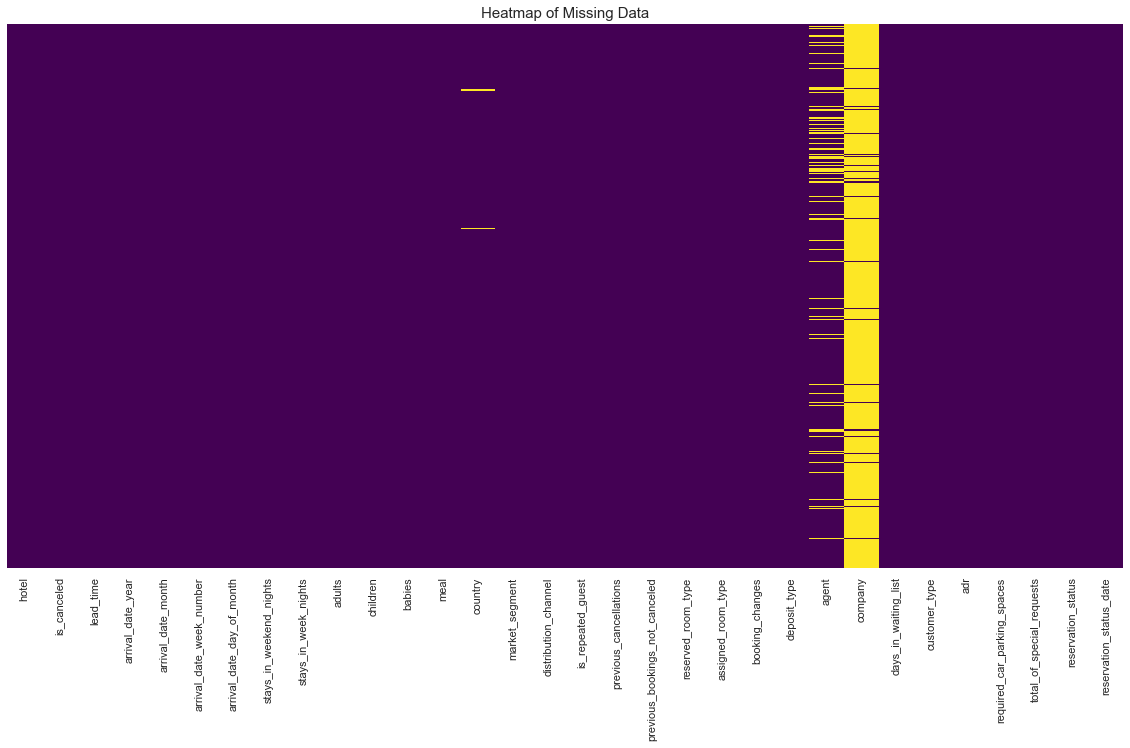

In [6]:
# A graphical overview on the data that is missing
plt.figure(figsize = (20,10))
sb.heatmap(hotel_df.isna(), cbar = False, annot = None, yticklabels = False, cmap = 'viridis')
plt.title("Heatmap of Missing Data", fontsize=15)
plt.show()

# Yellow: NaN
# Purple: Have data

In [7]:
# Check the number of Na values in all the columns
hotel_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# Drop the rows with no country values
# This is to remove rows where the country data is missing
hotel_df.drop(hotel_df[hotel_df['country'].isna()].index, axis = 0, inplace = True)

In [9]:
# Check the number of Na values in all the columns after Na country were dropped
hotel_df.isna().sum()

# children, agent and company still contains missing data

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16006
company         

In [10]:
# Here we are going to make 3 assumptions for the 3 columns that contains Na values
# children: If value is Na, assume that means no children. Hence value is 0.
# agent: If value is Na, assume that means customer did not book through agent. hence agent value (Id of agent) is 0.
# company: If value is Na, assume that customner did not have any company book for them. Hence company value is (Id of company) 0.
hotel_df.fillna(0, inplace = True)

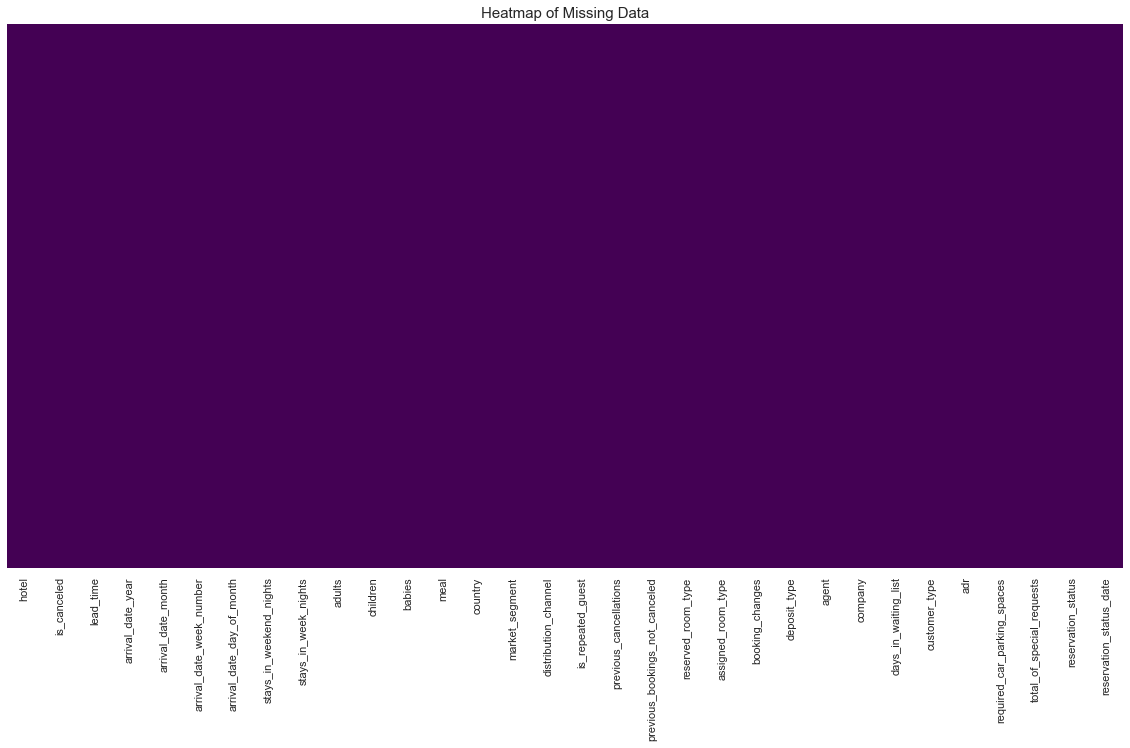

In [11]:
# A graphical overview on the data that is missing, after handling of Na values is carried out
plt.figure(figsize = (20,10))
sb.heatmap(hotel_df.isna(), cbar = False, annot = None, yticklabels = False, cmap = 'viridis')
plt.title("Heatmap of Missing Data", fontsize=15)
plt.show()

# Yellow: NaN
# Purple: Have data

### Formatting Data
---

This section deals with reformatting data into forms that we prefer to handle. 

In this sub-section, we have done the following:

- Created `hasKids` column: Represents whether the customer has kids. This is derived from combination  of the `children` and `babies` column.


- Created `useAgent` column: Represents whether the customer made the booking via an agent. This is derived from the `agent` column contains the id of agent used, which is not really relevant to us.


- Created `useCompany` column: Represents whether the customer made the booking via a company. This is derived from the `company` column contains the id of company used, which is once again, not really relevant to us.


- Created `arrival_day_of_week` column: Tells us the day of week the customer arrived.


- Created `total_nights` column: Tells us the duration of stay.

In [12]:
# Creating a function to check if 2 columns contains 0
# This is a utility function that allows us to convert large numeric data into categorical ones
def twoColumnConverter(cluster):
    if (0 == cluster[0]) and (0 == cluster[1]):
        return 0
    else:
        return 1

# Creating a function to check if a columns contains 0
# This is a utility function that allows us to convert large numeric data into categorical ones
def oneColumnConverter(cluster):
    if cluster == 0:
        return 0
    else:
        return 1

In [13]:
# Creating a new column called "isfamily", if customer has children or babies, we will classify them as a family
hotel_df['hasKids'] = hotel_df[['children', 'babies']].apply(twoColumnConverter, axis = 1)
# Check for the result
hotel_df['hasKids'].value_counts()

0    109584
1      9318
Name: hasKids, dtype: int64

In [14]:
# Import time series libraries
from time import strptime
import calendar
import datetime

In [15]:
# Creating date of arrival column
temp_df = pd.DataFrame({'year': hotel_df["arrival_date_year"],
                   'month': [datetime.datetime.strptime(MONTH[:3], "%b").month for MONTH in hotel_df["arrival_date_month"]],
                   'day': hotel_df["arrival_date_day_of_month"]})

hotel_df['date_of_arrival'] = pd.to_datetime(temp_df[["year", "month", "day"]])

# Creating day of week arrival column
hotel_df['arrival_day_of_week'] = hotel_df['date_of_arrival'].apply(lambda x: calendar.day_name[x.weekday()])

In [16]:
# Creating 2 new columns
# useAgent: represents if the customer books the hotel room through an agent
# useCompany: represents if the customer books the hotel room through a company
hotel_df['useAgent'] = hotel_df['agent'].apply(oneColumnConverter)
hotel_df['useCompany'] = hotel_df['company'].apply(oneColumnConverter)

# Creating a new column total_nights for duration of the stay
hotel_df['total_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

### Handling Outliers
---
This section deals with the extreme outliers within the data set. 

We utilised `boxplot` and `histogram` to provide a visual representation of the outliers that exists. As seen below, the data is extremely right skewed due to a few outliers at the extreme right.

In this sub-section, we have done the following:

- Removed outliers in `adr` column, this includes values where adr > 5000 as the it is an extreme outlier which does not accurately represent the dataset, and adr == 0, as it does not make much sense that the price of the hotel room is equals to 0.

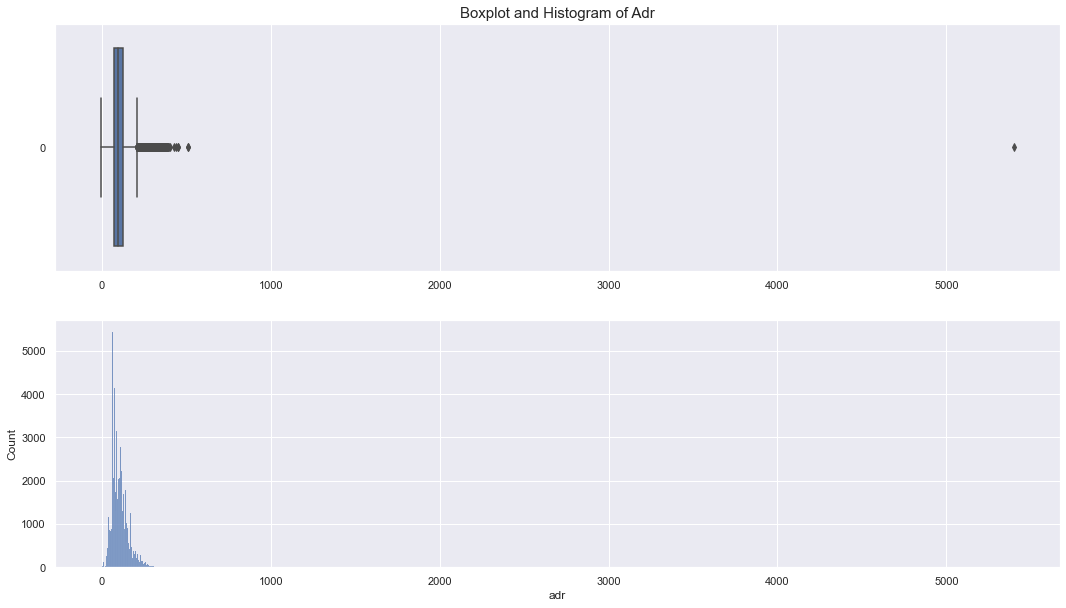

In [17]:
# Visualising the ADR data
f, axes = plt.subplots(2, 1, figsize=(18, 10))

fig = sb.boxplot(data = hotel_df['adr'], orient = "h", ax = axes[0])
fig.set_title("Boxplot and Histogram of Adr", fontsize=15)
sb.histplot(data = hotel_df['adr'], ax = axes[1])
plt.show()

In [18]:
# Drop rows where ADR > 5000 and ADR == 0
# Drop ADR > 5000 as the it is an extreme outlier which does not accurately represent the dataset
# Drop ADR == 0, as it does not make much sense that the price of the hotel room is equals to 0
hotel_df.drop(hotel_df.index[(hotel_df["adr"] > 2000) | (hotel_df["adr"] <= 0)] ,axis = 0, inplace = True)
hotel_df.reset_index(inplace=True)

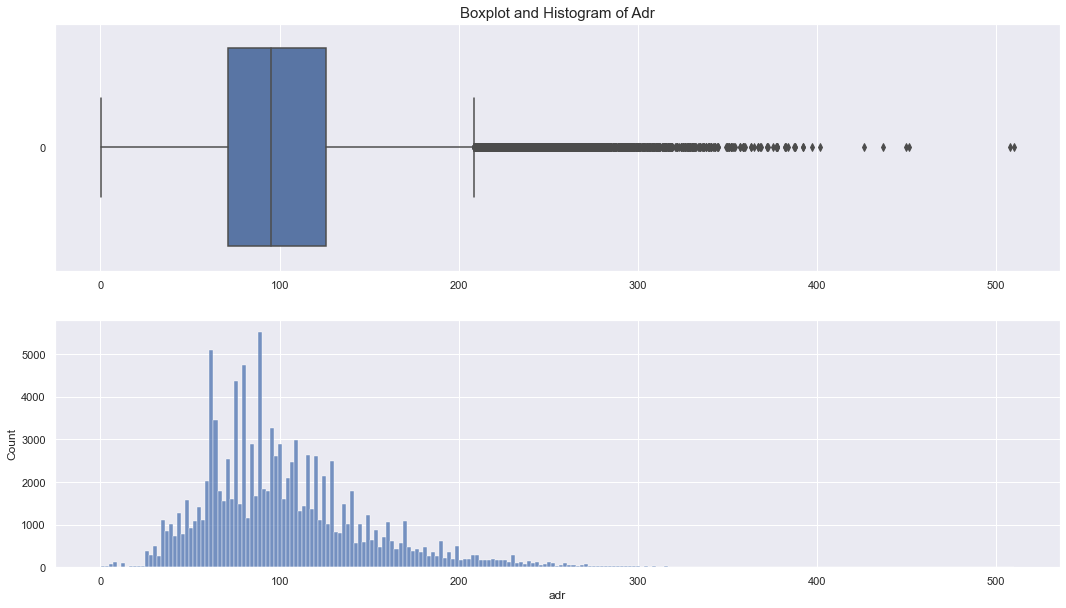

In [19]:
# Visualising the ADR data after outliers have been dropped
f, axes = plt.subplots(2, 1, figsize=(18, 10))

fig = sb.boxplot(data = hotel_df['adr'], orient = "h", ax = axes[0])
fig.set_title("Boxplot and Histogram of Adr", fontsize=15)
sb.histplot(data = hotel_df['adr'], ax = axes[1])
plt.show()

# Export Cleaned DF to CSV

In [24]:
hotel_df.to_csv('cleaned-hotel-dataset.csv')